In [ ]:
import requests
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
url = 'https://api.spacexdata.com/v4/'

In [ ]:
def getBoosters(data):
  for x in data['rocket']:
    res = requests.get(url+ 'rockets/' + str(x)).json()
    BoosterVersion.append(res['name'])

In [ ]:
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get(url + "launchpads/" + str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [ ]:
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get(url + "payloads/" + load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [ ]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get(url + "cores/" + core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [ ]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

In [ ]:
data = pd.json_normalize(response.json())
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [ ]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

data['date'] = pd.to_datetime(data['date_utc']).dt.date

data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [ ]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [ ]:
getBoosters(data)
getPayloadData(data)
getLaunchSite(data)
getCoreData(data)

In [ ]:
launch_dict = {
'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

df = pd.DataFrame.from_dict(launch_dict)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [ ]:
df = df[df['BoosterVersion']=='Falcon 9']

In [ ]:
df['BoosterVersion'].unique()

array(['Falcon 9'], dtype=object)

In [ ]:
df.loc[:,'FlightNumber'] = list(range(1, df.shape[0]+1))

In [ ]:
df.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,5
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [ ]:
df['PayloadMass'].fillna(df['PayloadMass'].mean(), inplace=True)

<ipython-input-17-53ab554465dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PayloadMass'].fillna(df['PayloadMass'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,0
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [ ]:
df.dtypes

,0
FlightNumber,int64
Date,object
BoosterVersion,object
PayloadMass,float64
Orbit,object
LaunchSite,object
Outcome,object
Flights,int64
GridFins,bool
Reused,bool


In [ ]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [ ]:
df['Orbit'].value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
HEO,1
ES-L1,1


In [ ]:
dfa = df['Outcome'].value_counts()
dfa

,count
Outcome,
True ASDS,41
None None,19
True RTLS,14
False ASDS,6
True Ocean,5
False Ocean,2
None ASDS,2
False RTLS,1


In [ ]:
bad_outcomes = dfa.keys()[[1,3,5,6,7]]
bad_outcomes

Index(['None None', 'False ASDS', 'False Ocean', 'None ASDS', 'False RTLS'], dtype='object', name='Outcome')

In [ ]:
df['outcome_type'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

<ipython-input-24-f3d2c79bbfd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome_type'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)


In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,outcome_type
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


## Visualization

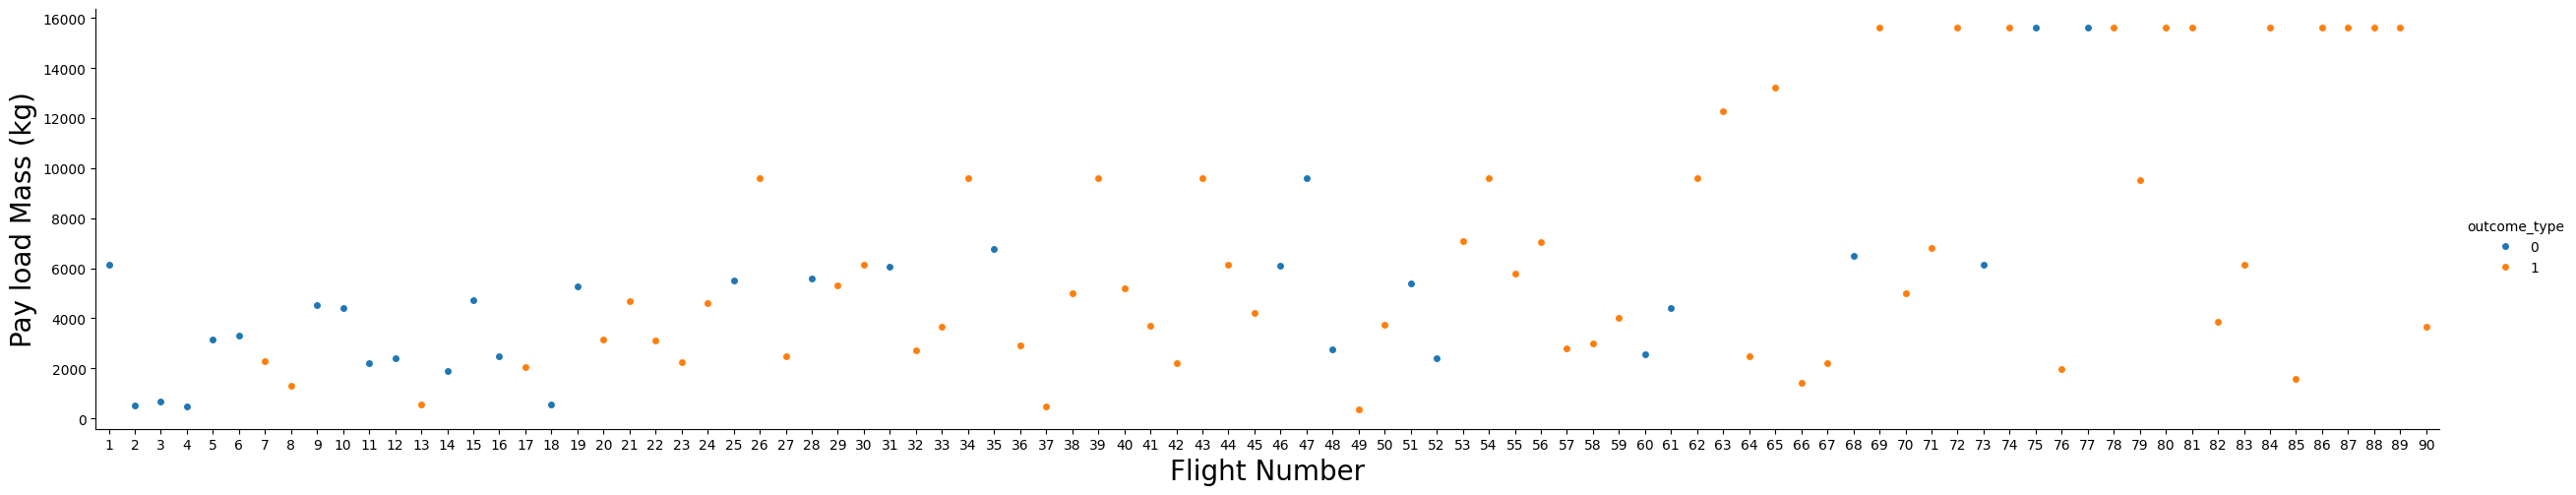

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="outcome_type", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

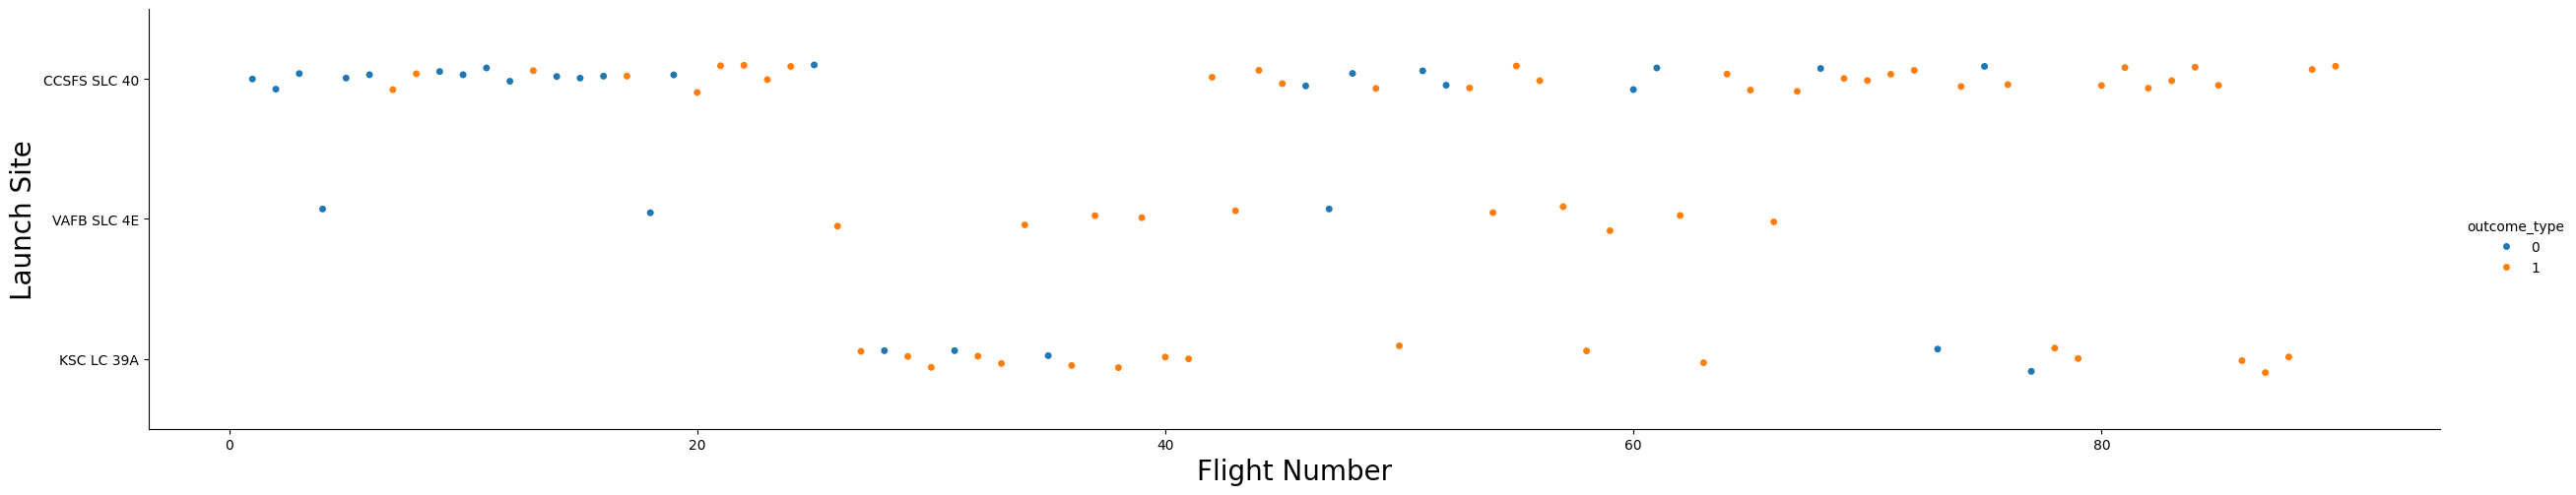

In [ ]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="outcome_type", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

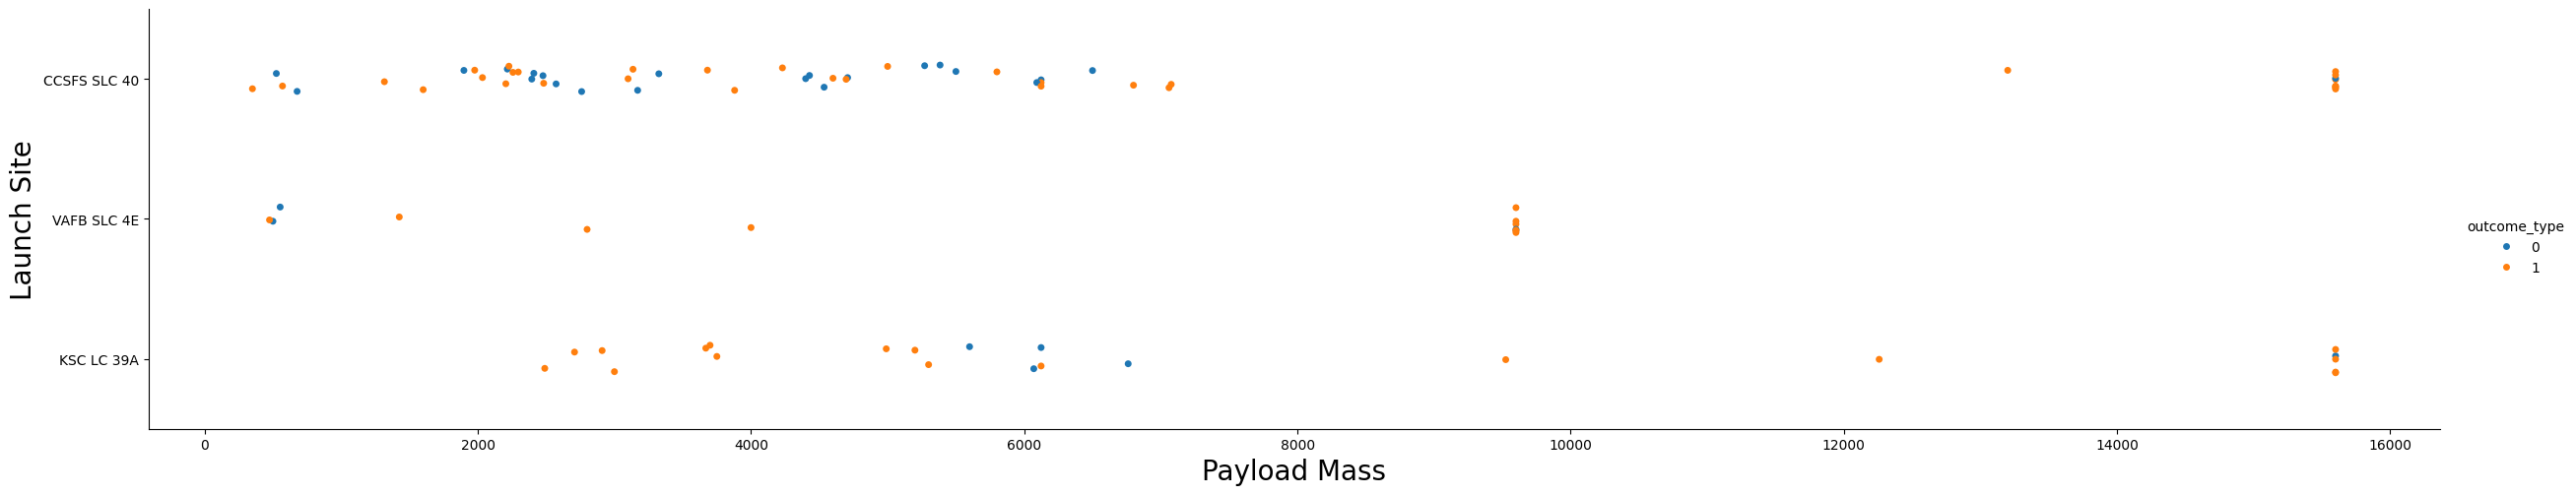

In [ ]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="outcome_type", data=df, aspect = 5)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can see from the plot that CCSFS SLC 40 has handled launches of rockets with greater mass aswell. However KSC LC 39A has dealt with more of meidum mass rockets.

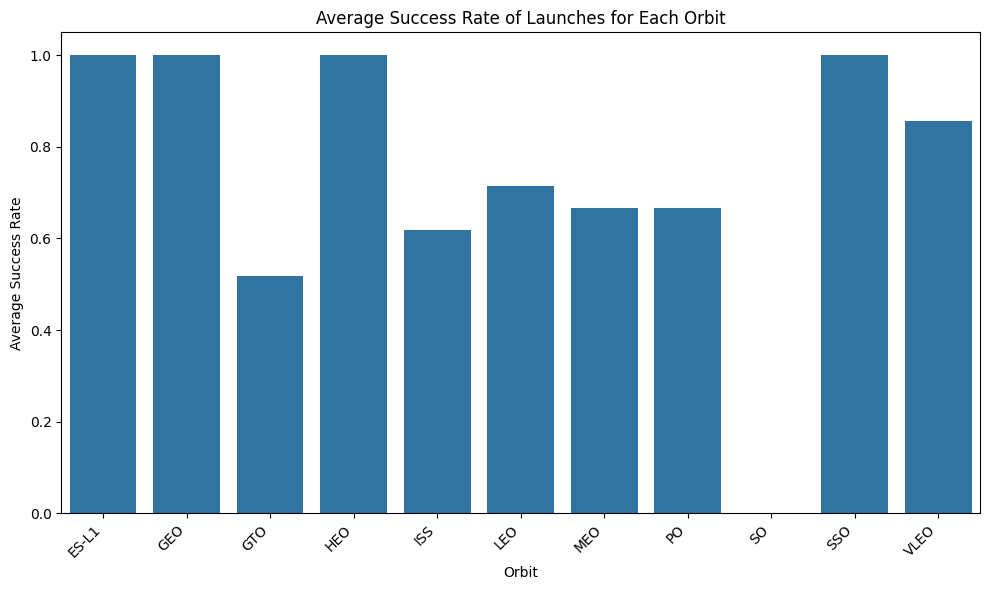

In [ ]:
orbit_success_rate = df.groupby('Orbit')['outcome_type'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel('Orbit')
plt.ylabel('Average Success Rate')
plt.title('Average Success Rate of Launches for Each Orbit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


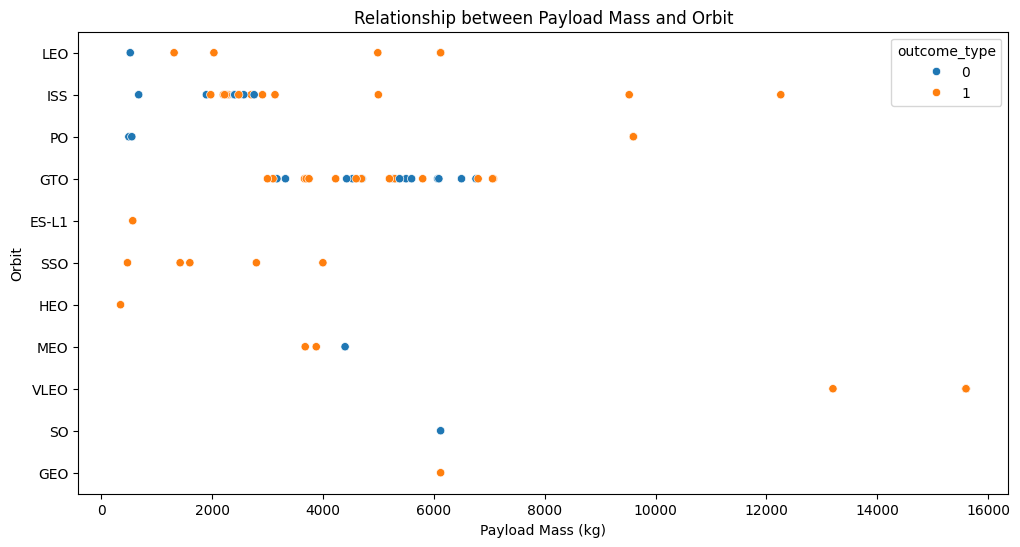

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='outcome_type', data=df)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.title('Relationship between Payload Mass and Orbit')
plt.show()

The plot illustrates the relationship between payload mass and the target orbit of the SpaceX launches.
We can observe that certain orbits, like 'GTO' (Geostationary Transfer Orbit) and 'SSO' (Sun-synchronous Orbit), tend to have heavier payloads compared to others, like 'LEO' (Low Earth Orbit).

This is likely due to the requirements of the mission and the specific characteristics of each orbit. For instance, missions to higher orbits often require greater payload mass to reach the necessary velocity and altitude.

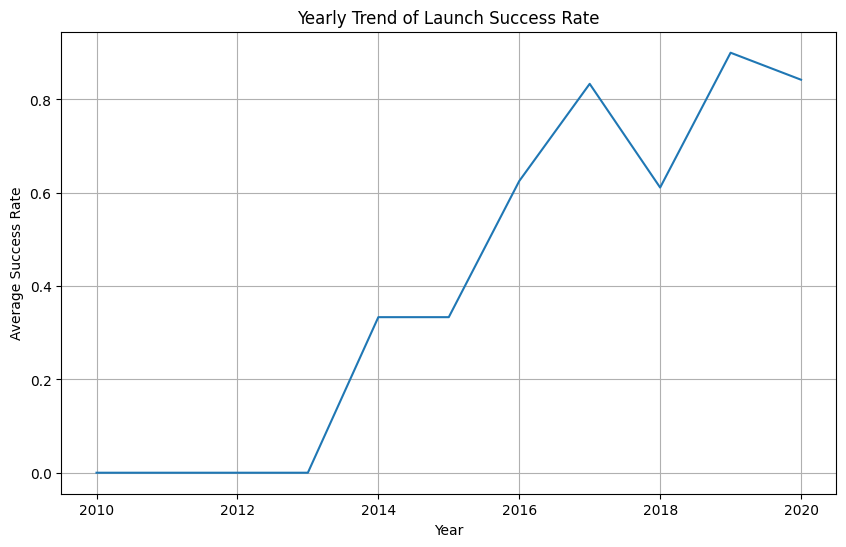

In [ ]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

yearly_success_rate = df.groupby('Year')['outcome_type'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values)
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Yearly Trend of Launch Success Rate')
plt.grid(True)
plt.show()


## Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 4 to 93
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  outcome_type    90 non-null     int64  
 1

In [ ]:
df['LandingPad'].unique()

array([None, '5e9e3032383ecb761634e7cb', '5e9e3032383ecb6bb234e7ca',
       '5e9e3032383ecb267a34e7c7', '5e9e3033383ecbb9e534e7cc',
       '5e9e3032383ecb554034e7c9'], dtype=object)

In [ ]:
features = df.drop(['Date', 'Outcome', 'Year',  'LandingPad'], axis=1)

In [ ]:
features.drop(['BoosterVersion'], axis = 1, inplace=True)

In [ ]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,outcome_type
4,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,0
5,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,0
6,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,0
7,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,0
8,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
features['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [ ]:
orbit_dummies = pd.get_dummies(features['Orbit'], prefix='Orbit', dtype=int)
features = pd.concat([features, orbit_dummies], axis=1)
features.drop(['Orbit'], axis=1, inplace=True)
features.head()


,FlightNumber,PayloadMass,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
4,1,6123.547647,CCSFS SLC 40,1,False,False,False,1.0,0,B0003,...,0,0,0,0,1,0,0,0,0,0
5,2,525.000000,CCSFS SLC 40,1,False,False,False,1.0,0,B0005,...,0,0,0,0,1,0,0,0,0,0
6,3,677.000000,CCSFS SLC 40,1,False,False,False,1.0,0,B0007,...,0,0,0,1,0,0,0,0,0,0
7,4,500.000000,VAFB SLC 4E,1,False,False,False,1.0,0,B1003,...,0,0,0,0,0,0,1,0,0,0
8,5,3170.000000,CCSFS SLC 40,1,False,False,False,1.0,0,B1004,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
lsite_dummies = pd.get_dummies(features['LaunchSite'], prefix='LaunchSite', dtype=int)
features = pd.concat([features, lsite_dummies], axis=1)
features.drop(['LaunchSite'], axis=1, inplace=True)
features.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,...,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
4,1,6123.547647,1,False,False,False,1.0,0,B0003,-80.577366,...,0,1,0,0,0,0,0,1,0,0
5,2,525.000000,1,False,False,False,1.0,0,B0005,-80.577366,...,0,1,0,0,0,0,0,1,0,0
6,3,677.000000,1,False,False,False,1.0,0,B0007,-80.577366,...,1,0,0,0,0,0,0,1,0,0
7,4,500.000000,1,False,False,False,1.0,0,B1003,-120.610829,...,0,0,0,1,0,0,0,0,0,1
8,5,3170.000000,1,False,False,False,1.0,0,B1004,-80.577366,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
boolMap = {
    False : 0,
    True : 1
}

features['GridFins'] = features['GridFins'].map(boolMap)
features['Reused'] = features['Reused'].map(boolMap)
features['Legs'] = features['Legs'].map(boolMap)

In [ ]:
features['Serial'].unique()

array(['B0003', 'B0005', 'B0007', 'B1003', 'B1004', 'B1005', 'B1006',
       'B1007', 'B1008', 'B1011', 'B1010', 'B1012', 'B1013', 'B1015',
       'B1016', 'B1018', 'B1019', 'B1017', 'B1020', 'B1021', 'B1022',
       'B1023', 'B1025', 'B1026', 'B1028', 'B1029', 'B1031', 'B1030',
       'B1032', 'B1034', 'B1035', 'B1036', 'B1037', 'B1039', 'B1038',
       'B1040', 'B1041', 'B1042', 'B1043', 'B1044', 'B1045', 'B1046',
       'B1047', 'B1048', 'B1049', 'B1050', 'B1054', 'B1051', 'B1056',
       'B1059', 'B1058', 'B1060', 'B1062'], dtype=object)

## Modelling

In [ ]:
features.drop(['Serial'], axis = 1, inplace=True)

In [ ]:
Y = df['outcome_type']
X = features.drop(['outcome_type'], axis = 1)

In [ ]:
Y.head()

,outcome_type
4,0
5,0
6,0
7,0
8,0


In [ ]:
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Longitude', 'Latitude', 'Orbit_ES-L1',
       'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO',
       'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO',
       'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E'],
      dtype='object')

In [ ]:
transform = preprocessing.StandardScaler()

In [ ]:
X = transform.fit_transform(X)
X

array([[-1.71291154,  0.        , -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       [-1.67441914, -1.18972425, -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       [-1.63592675, -1.15742336, -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       ...,
       [ 1.63592675,  2.01380177,  3.49060516, ..., -1.25356634,
         1.75809815, -0.4108907 ],
       [ 1.67441914,  2.01380177,  1.00389436, ...,  0.79772404,
        -0.56879646, -0.4108907 ],
       [ 1.71291154, -0.51905572, -0.65391284, ...,  0.79772404,
        -0.56879646, -0.4108907 ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72, 24), (18, 24), (72,), (18,))

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {
              'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

In [ ]:
best_estimators = {}
best_params = {}
best_scores = {}

for model_name in models.keys():
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(x_train, y_train)

    # Store the best model, parameters, and score
    best_estimators[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_

    # Print the results for each model
    print(f"{model_name} Best Score: {grid_search.best_score_}")
    print(f"{model_name} Best Parameters: {grid_search.best_params_}\n")

Logistic Regression Best Score: 0.8333333333333334
Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Support Vector Machine Best Score: 0.82
Support Vector Machine Best Parameters: {'C': 0.1, 'kernel': 'linear'}

Decision Tree Best Score: 0.8447619047619048
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 10}

K-Nearest Neighbors Best Score: 0.8476190476190476
K-Nearest Neighbors Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}



In [ ]:
finalmodel = KNeighborsClassifier(n_neighbors=7, weights='uniform')
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.7777777777777778


In [ ]:
finalmodel = DecisionTreeClassifier(max_depth=10, min_samples_split = 10)
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.6111111111111112


In [ ]:
finalmodel = SVC(C=0.1, kernel='linear')
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.8333333333333334


In [ ]:
finalmodel = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
finalmodel.fit(x_train, y_train)
y_pred = finalmodel.predict(x_test)
print("Accuracy: ", finalmodel.score(x_test, y_test))

Accuracy:  0.8333333333333334
